# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# See readme file.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# import the dataset

vehicles = pd.read_csv('data/vehicles.csv')
vehicles

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [4]:
# check summary statistics

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
# check for null by column

vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
# check for number of unique entries per column

vehicles.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

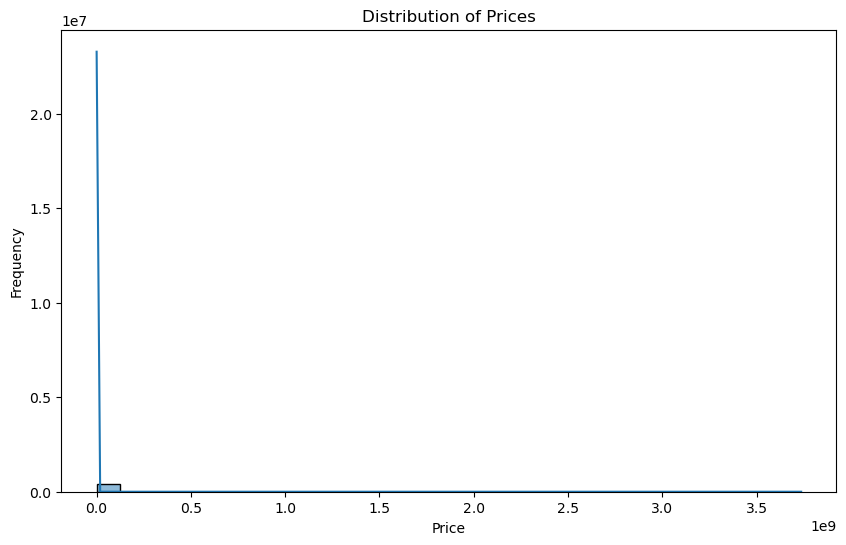

In [7]:
# check distribution of prices

plt.figure(figsize=(10, 6))
sns.histplot(vehicles['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

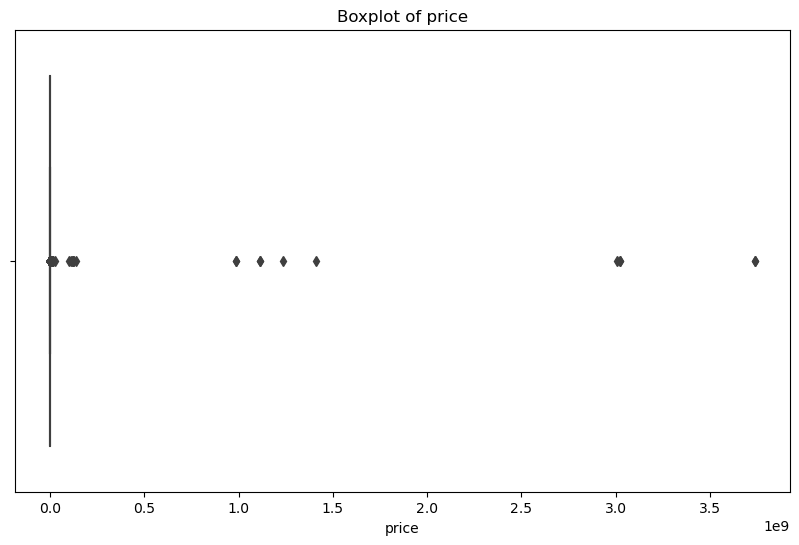

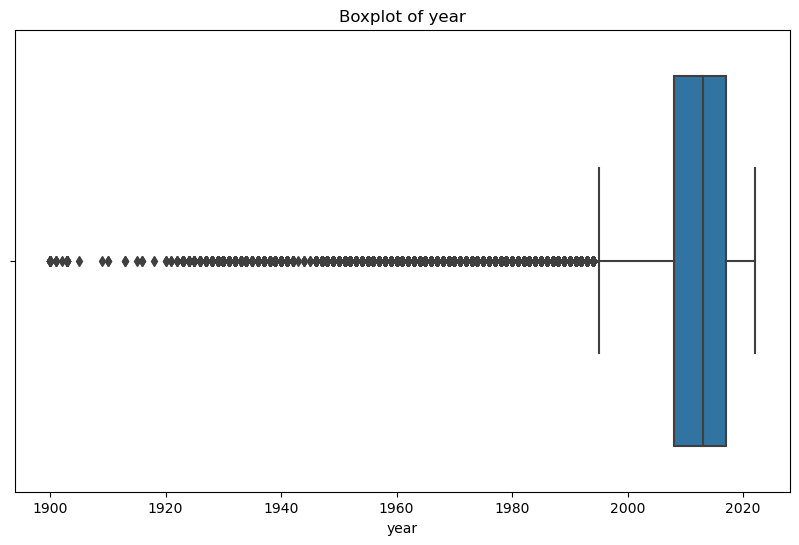

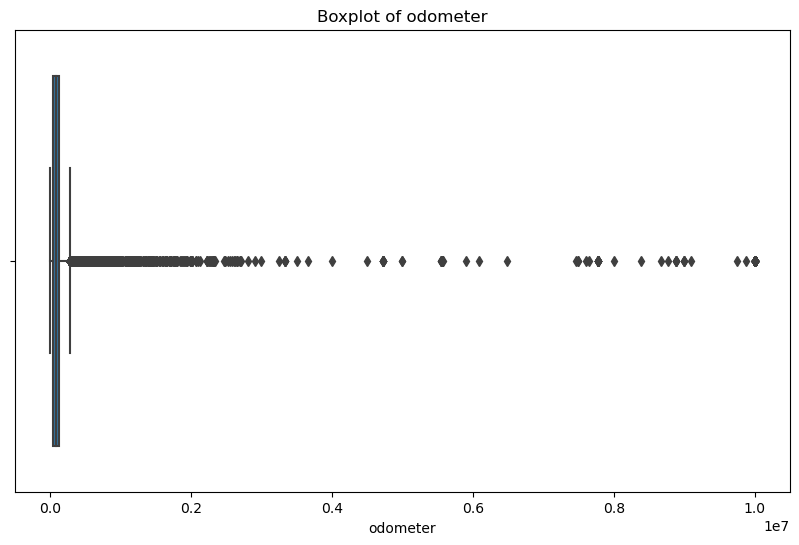

In [8]:
# check distribution of key numerical variables - price, year, and mileage

columns_to_plot = ['price', 'year', 'odometer']  

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=vehicles[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

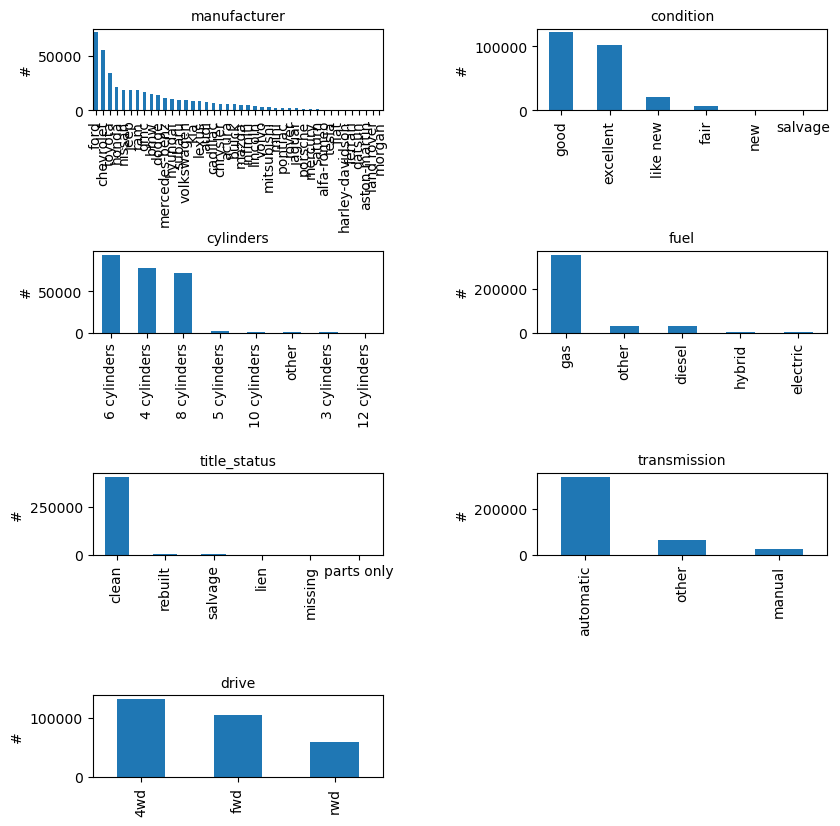

In [9]:
columns_to_plot = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive']  

# formatting number of images
n_rows = 4
n_cols = 2  

# creating subplot figures
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))  
fig.subplots_adjust(hspace=0.2, wspace=0.2)  
fig.tight_layout(pad=8.0)

# importing the data for each subplot
for i, col in enumerate(columns_to_plot):
    ax = axes[i // n_cols, i % n_cols]  
    data = vehicles[col].value_counts()
    data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('', fontsize=8)
    ax.set_ylabel('#')
    
# formatting for uneven number
for j in range(i + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [10]:
# dropping size and VIN due to data type or nulls

columns_to_remove_revised = ['size', 'VIN']
vehicles_mod = vehicles.drop(columns=columns_to_remove_revised)

In [11]:
# fill in null values in data set for drive, condition, cylinders, and other columns - mode for categorical, median for numerical

columns_to_fill = ['drive', 'condition', 'cylinders']

for column in columns_to_fill:
    if vehicles_mod[column].dtype == 'object':
        mode_value = vehicles_mod[column].mode()[0]
        vehicles_mod[column].fillna(mode_value, inplace=True)
    else:
        median_value = vehicles_mod[column].median()
        vehicles_mod[column].fillna(median_value, inplace=True)

for column in vehicles_mod.columns:
    if column not in columns_to_fill:
        if vehicles_mod[column].dtype == 'object':
            mode_value = vehicles_mod[column].mode()[0]
            vehicles_mod[column].fillna(mode_value, inplace=True)
        else:
            median_value = vehicles_mod[column].median()
            vehicles_mod[column].fillna(median_value, inplace=True)

In [12]:
# checking the data summary of null values after modifications

vehicles_mod_fin = vehicles_mod.isnull().sum()
vehicles_mod_fin = vehicles_mod.copy()

vehicles_mod_fin

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,7222695916,prescott,6000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,az
1,7218891961,fayetteville,11900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ar
2,7221797935,florida keys,21000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,fl
3,7222270760,worcester / central MA,1500,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ma
4,7210384030,greensboro,4900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [13]:
# filtering for outliers that may skew pricing model (>60k, <5k price), year (>30 years old), and odometer (>300k miles driven)

vehicles_mod_fin_filtered = vehicles_mod_fin[
    (vehicles_mod_fin['price'] <= 100000) &
    (vehicles_mod_fin['price'] >= 3000) &
    (vehicles_mod_fin['year'] >= 1993) & 
    (vehicles_mod_fin['odometer'] <= 300000)
]

In [14]:
# removing other features that may based on logic in readme

columns_to_drop = ['id', 'paint_color', 'region', 'model', 'state']
vehicles_mod_fin_selected = vehicles_mod_fin_filtered.drop(columns=columns_to_drop)

In [15]:
# one hot encoding select categorical variables

columns_to_encode = ['manufacturer','condition', 'cylinders', 'title_status', 'transmission', 'type',  'fuel', 'drive']
vehicles_mod_fin_encoded = pd.get_dummies(vehicles_mod_fin_selected, columns=columns_to_encode)

In [16]:
# checking modified dataset

vehicles_mod_fin_encoded

,price,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_van,type_wagon,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_4wd,drive_fwd,drive_rwd
0,6000,2013.0,85548.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,11900,2013.0,85548.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,21000,2013.0,85548.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,4900,2013.0,85548.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,15995,2013.0,85548.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,32226.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
426876,30590,2020.0,12029.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
426877,34990,2020.0,4174.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
426878,28990,2018.0,30112.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [17]:
# separating features and price 

X = vehicles_mod_fin_encoded.drop('price', axis=1)
y = vehicles_mod_fin_encoded['price']

# splitting into training / test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking output shape

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (278755, 86)
X_test shape: (69689, 86)
y_train shape: (278755,)
y_test shape: (69689,)


In [18]:
# computing RMSE with various regression models, starting with linear regression

def evaluate_model(model, X_train, y_train):
    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-cv_scores)
    return rmse_scores

# linear regression model
lin_reg = LinearRegression()
lin_reg_rmse = evaluate_model(lin_reg, X_train, y_train)
print("Linear Regression RMSE:", np.mean(lin_reg_rmse))

Linear Regression RMSE: 7898.334629497966


In [19]:
#conduct r2 assessment from linear regression 

variables = vehicles_mod_fin_encoded.columns.drop('price')  
r_squared_values = {}

for var in variables:
    X = vehicles_mod_fin_encoded[[var]]
    y = vehicles_mod_fin_encoded['price']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    r_squared = r2_score(y, y_pred)
    r_squared_values[var] = r_squared
    sorted_r_squared = sorted(r_squared_values.items(), key=lambda x: x[1], reverse=True)

for var, r2 in sorted_r_squared:
    if r2 > 0.01:
        print(f"{var}: R-squared = {r2}")

year: R-squared = 0.33414486519594255
odometer: R-squared = 0.29344151459848844
fuel_gas: R-squared = 0.09959768594996987
fuel_diesel: R-squared = 0.0849672751174203
drive_fwd: R-squared = 0.07537251499230635
cylinders_4 cylinders: R-squared = 0.07289373373780506
transmission_other: R-squared = 0.07046323355111639
type_pickup: R-squared = 0.0556877957119154
type_sedan: R-squared = 0.052193534843384626
transmission_automatic: R-squared = 0.04371550478562081
drive_4wd: R-squared = 0.04136773351040879
type_truck: R-squared = 0.03395750189702973
condition_good: R-squared = 0.03189477329579937
condition_excellent: R-squared = 0.03121015869212518
fuel_other: R-squared = 0.028518003931142455
manufacturer_ram: R-squared = 0.028463117134402305
cylinders_8 cylinders: R-squared = 0.02675800399352135
type_other: R-squared = 0.016488361524875095
manufacturer_honda: R-squared = 0.015620861888160475


In [20]:
# ridge regression model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_reg = Ridge(alpha=0.1)
ridge_rmse = evaluate_model(ridge_reg, X_train, y_train)
print("Ridge Regression RMSE:", np.mean(ridge_rmse))

Ridge Regression RMSE: 7898.332512481336


In [21]:
# lasso regression model

lasso_reg = Lasso(alpha=0.1, max_iter=10000)
lasso_rmse = evaluate_model(lasso_reg, X_train, y_train)
print("Lasso Regression RMSE:", np.mean(lasso_rmse))

Lasso Regression RMSE: 7898.33555163157


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [22]:
# analysis to assess alpha optimization for ridge model

# define alpha value range

alpha_range = [0.01, 0.1, 1, 10, 100]

# set up GridSearchCV 

ridge_param_grid = {'alpha': alpha_range}
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# print proposed alpha and best parameters for RMSE

best_ridge_alpha = ridge_grid_search.best_params_['alpha']
best_ridge_rmse = np.sqrt(-ridge_grid_search.best_score_)
print(f"Best Ridge Alpha: {best_ridge_alpha}, Best RMSE: {best_ridge_rmse}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.24818e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.24845e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.24717e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.24799e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

Best Ridge Alpha: 0.1, Best RMSE: 7898.405760570747


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.97586e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [23]:
# analysis to assess k folds for linear regression model

model = LinearRegression()

# select number of k folds

k = 5

# k-fold cross-validation

cv_scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')

# calculate RMSE for each fold

rmse_scores = np.sqrt(-cv_scores)

# calculate average RMSE across folds

average_rmse = np.mean(rmse_scores)

# print values

print("RMSE scores for each fold:", rmse_scores)
print("Average RMSE:", average_rmse)

RMSE scores for each fold: [14012.0635457  13979.03479258 13611.32391408 13977.05856852
 15013.44916261]
Average RMSE: 14118.585996699214


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [24]:
# See readme file.